<a href="https://colab.research.google.com/github/somnathsingh31/Projects/blob/Temperory/CBOW_Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bhagavad geeta as dataset (CBOW model)

In [1]:
with open('/content/bhagavad_gita.txt', 'r') as file:
  geeta_text = file.read()

In [2]:
geeta_text

'धृतराष्ट्र ने कहाः हे संजय! कुरुक्षेत्र की पवित्र भूमि पर युद्ध करने की इच्छा से एकत्रित होने के पश्चात, मेरे और पाण्डु पुत्रों ने क्या किया? संजय ने कहाः हे राजन्! पाण्डवों की सेना की व्यूहरचना का अवलोकन कर राजा दुर्योधन ने अपने गुरु द्रोणाचार्य के पास जाकर इस प्रकार के शब्द कहे। दुर्योधन ने कहाः पूज्य आचार्य! पाण्डु पुत्रों की विशाल सेना का अवलोकन करें, जिसे आपके द्वारा प्रशिक्षित बुद्धिमान शिष्य द्रुपद के पुत्र ने कुशलतापूर्वक युद्ध करने के लिए सुव्यवस्थित किया है। यहाँ इस सेना में भीम और अर्जुन के समान बलशाली युद्ध करने वाले महारथी युयुधान, विराट और द्रुपद जैसे अनेक शूरवीर धनुर्धर हैं। यहाँ पर इनके साथ धृष्टकेतु, चेकितान काशी के पराक्रमी राजा कांशिराज, पुरूजित, कुन्तीभोज और शैव्य सभी महान सेना नायक हैं। इनकी सेना में पराक्रमी युधमन्यु, शूरवीर, उत्तमौजा, सुभद्रा और द्रोपदी के पुत्र भी हैं जो सभी निश्चय ही महाशक्तिशाली योद्धा हैं। यहाँ इस सेना में भीम और अर्जुन के समान बलशाली युद्ध करने वाले महारथी युयुधान, विराट और द्रुपद जैसे अनेक शूरवीर धनुर्धर हैं। यहाँ पर इनके साथ धृष्टकेतु, चे

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
def data_preprocessing(text):
  text = re.sub(r'-',' ',text)
  text = re.sub(r'[,?!;/।\'"()]',"", text)
  text_tokenize = nltk.word_tokenize(text)
  #text_tokenize = [char for char in text_tokenize if char if char.isalpha() or char == '.']

  return text_tokenize

In [5]:
text_tokenize = data_preprocessing(geeta_text)

In [6]:
len(text_tokenize)

27373

In [7]:
#vocabulary size
v = len(set(text_tokenize))
print(v)

2846


Mapping unique words in vocab to indices and indices to word

In [8]:
#This will be used to convert into one hot encoder
def get_dict(text_tokenized):
  word2index = {}
  index2word = {}
  vocab = set(text_tokenized)
  i = 0
  for word in vocab:
    word2index[word] = i
    index2word[i] = word
    i += 1

  return word2index, index2word

In [9]:
word2index, index2word = get_dict(text_tokenize)

### Sliding window for calculating input and labels

In [10]:
def slide_window(word_list, c):
  ''' Takes list of tokenized words and 'c' as number of context words. Returns context_words_list, centre_word_list'''
  context_words_list = []
  centre_word_list = []
  i = c
  while i < len(word_list) - c:
    centre_word = word_list[i]
    context_words = word_list[(i-c):i] + word_list[(i+1):(i+c+1)]
    context_words_list.append(context_words)
    centre_word_list.append(centre_word)
    i += 1

  return context_words_list, centre_word_list

In [11]:
context_words_list, centre_word_list = slide_window(text_tokenize, 3)

### Converts word to one hot vector

In [15]:
def word_to_one_hot_vector(word, word2index, v):
  ''' takes a word, word to index dictionary and 'v' the size of vocab as input'''
  one_hot_vector = np.zeros(v)
  one_hot_vector[word2index[word]] = 1
  return one_hot_vector

In [16]:
def training_examples_to_vectors(text_tokenize, word2index, v, window_size):
  '''Input: training_example dictionary containing center word as key and context word as value'''
  context_words_list, centre_word_list = slide_window(text_tokenize, window_size)
  context_vectors, centre_vectors = [], []
  for centre_word, context_word in zip(centre_word_list, context_words_list):
    centre_vector = word_to_one_hot_vector(centre_word, word2index, v)
    centre_vectors.append(centre_vector)
    context_vector = [word_to_one_hot_vector(word, word2index, v) for word in context_word]
    context_vector = np.mean(context_vector, axis = 0)
    context_vectors.append(centre_vector)

  return np.array(context_vectors), np.array(centre_vectors)


In [17]:
context_vectors, centre_vectors = training_examples_to_vectors(text_tokenize, word2index, v, 3)

In [23]:
print(f' The size of input vector including all examples is: {context_vectors.shape} \n The size of output vector including all examples is: {centre_vectors.shape} \n The size of each example is: {context_vectors[0].shape}')

 The size of input vector including all examples is: (27367, 2846) 
 The size of output vector including all examples is: (27367, 2846) 
 The size of each example is: (2846,)


### Dataset split into training set and testing set

In [42]:
def train_test_split(all_data_set_array, split_percent = 0.8):
  ''' all_data_set_array is numpy array containing all examples'''
  row_size = all_data_set_array.shape[0]
  training_set = all_data_set_array[: int(split_percent * row_size), :]
  testing_set = all_data_set_array[int(split_percent * row_size) : , :]
  return training_set, testing_set

In [43]:
#dataset split
x_train, x_test = train_test_split(context_vectors, 0.8)
y_train, y_test = train_test_split(centre_vectors, 0.8)

In [44]:
x_train.shape

(21893, 2846)

In [46]:
#Size of embedding vector
embeddding_size = 300

## CBOW Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import save_model, load_model

In [48]:
cbow_model = Sequential()
#Adding hidden layer
cbow_model.add(Dense(units = embeddding_size, input_dim = x_train.shape[1], activation = 'relu'))
#Adding output layer
cbow_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
cbow_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cbow_model.fit(x_train, y_train, epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30
172/172 [==============================] - 9s 48ms/step - loss: 5.8782 - accuracy: 0.3624
Epoch 2/30
172/172 [==============================] - 8s 49ms/step - loss: 2.9748 - accuracy: 0.6533
Epoch 3/30
172/172 [==============================] - 7s 41ms/step - loss: 1.8999 - accuracy: 0.7940
Epoch 4/30
172/172 [==============================] - 9s 50ms/step - loss: 1.3932 - accuracy: 0.8559
Epoch 5/30
172/172 [==============================] - 7s 40ms/step - loss: 1.0813 - accuracy: 0.8944
Epoch 6/30
172/172 [==============================] - 8s 49ms/step - loss: 0.8587 - accuracy: 0.9157
Epoch 7/30
172/172 [==============================] - 7s 40ms/step - loss: 0.6968 - accuracy: 0.9372
Epoch 8/30
172/172 [==============================] - 8s 49ms/step - loss: 0.5748 - accuracy: 0.9466
Epoch 9/30
172/172 [==============================] - 7s 42ms/step - loss: 0.4767 - accuracy: 0.9537
Epoch 10/30
172/172 [==============================] - 8s 47ms/step - loss: 0.3949 - accura

In [49]:
score = cbow_model.evaluate(x_test, y_test, batch_size=128)
print(score)

43/43 [==============================] - 2s 33ms/step - loss: 1.3070 - accuracy: 0.9068
[1.3069669008255005, 0.9068322777748108]


In [89]:
# Save the trained model
cbow_model.save('cbow_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Later, reload the model
#loaded_model = load_model('cbow_model.h5')

In [50]:
#Predict
predictions = cbow_model.predict(x_test)

172/172 [==============================] - 3s 10ms/step


In [66]:
predictions.shape

(5474, 2846)

In [52]:
weights = cbow_model.get_weights()

In [64]:
# Display the weights for each layer
k,l = 0,0
for i, layer_weights in enumerate(weights):
  #k += 1
  if i % 2 == 0:
    k += 1
    print(f"Layer {k} Weights:")
    print(layer_weights.shape)
    print("\n")
  else:
    l += 1
    print(f"Layer {k} Biases:")
    print(layer_weights.shape)
    print("\n")

Layer 1 Weights:
(2846, 300)


Layer 1 Biases:
(300,)


Layer 2 Weights:
(300, 2846)


Layer 2 Biases:
(2846,)




In [56]:
#The None in Keras means that this dimension will be determined during runtime based on the actual input data.
cbow_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               854100    
                                                                 
 dense_3 (Dense)             (None, 2846)              856646    
                                                                 
Total params: 1710746 (6.53 MB)
Trainable params: 1710746 (6.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Calculating average embeding matrix

In [94]:
embedding_matrix = ((weights[0] + weights[1].T) + (weights[2] + weights[3].T).T)/2 #Note weights[0] is weight of layer 1 weights[1].T is baise of layer 1
embedding_matrix.shape

(2846, 300)

### Convert predicted output vector into words

In [69]:
def vector_to_word(predicted_examples, index2word = index2word):
  predicted_words = []
  number_of_examples = predicted_examples.shape[0]
  for i in range (number_of_examples):
    max_index = np.argmax(predicted_examples[i])
    predicted_words.append(index2word[max_index])

  return predicted_words

In [ ]:
predicted_words = vector_to_word(predictions, index2word = index2word)

In [72]:
test_words = centre_word_list[-len(predicted_words):]

In [83]:
import pandas as pd
view_table = {}
view_table['Original Words'] = test_words
view_table['Predicted Words'] = predicted_words
df = pd.DataFrame(view_table)
df.head(30)

,Original Words,Predicted Words
0,जाति,जाति
1,के,के
2,कर्मों,कर्मों
3,का,का
4,कारण,कारण
5,हैं,हैं
6,इस,इस
7,संसार,संसार
8,में,में
9,इस,इस


In [88]:
#Words not correctly predicted
df[df['Original Words'] != df['Predicted Words']]

,Original Words,Predicted Words
43,सशक्त,रख
49,तभी,रख
62,जिनसे,रख
67,अनादिकाल,रख
124,सशक्त,रख
...,...,...
5415,संवाद,रख
5432,विस्मयकारी,रख
5440,चकित,रख
5444,हर्ष,रख


### Visualizing the word vectors

In [120]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['धृतराष्ट्र','संजय','कुरुक्षेत्र', 'पवित्र','भूमि','इच्छा','शब्द','दुर्योधन','पूज्य','आचार्य','पाण्डु','पुत्रों','विशाल','सेना','अवलोकन','प्रशिक्षित','बुद्धिमान','शिष्य','द्रुपद','पुत्र','कुशलतापूर्वक','युद्ध']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2index[word] for word in words]
X = embedding_matrix[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each

(22, 300) [325, 1987, 571, 1097, 2051, 374, 1045, 2544, 1983, 1447, 758, 2531, 1765, 2678, 2293, 321, 2461, 850, 2533, 1330, 2046, 523]


In [116]:
# Download and extract the Noto Sans Devanagari font
!wget -qO NotoSansDevanagari.zip https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip
!unzip -p NotoSansDevanagari.zip NotoSansDevanagari-Regular.ttf > NotoSansDevanagari-Regular.ttf
!rm NotoSansDevanagari.zip

In [117]:
from matplotlib import pyplot, rcParams
import matplotlib.font_manager as fm
import os

# Specify the font and model directory
directory = '/content/'
font_directory = os.path.join(directory, 'fonts/')

# Move the font file to the appropriate directory
os.makedirs(font_directory, exist_ok=True)
os.replace('NotoSansDevanagari-Regular.ttf', os.path.join(font_directory, 'NotoSansDevanagari-Regular.ttf'))

# Load the Noto Sans Devanagari font
font_prop = fm.FontProperties(fname=os.path.join(font_directory, 'NotoSansDevanagari-Regular.ttf'))

# Set Matplotlib rcParams to use the Noto Sans Devanagari font
rcParams['font.family'] = font_prop.get_name()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


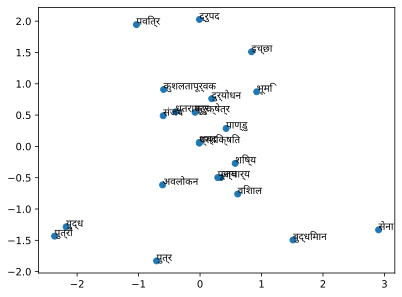

In [121]:
from sklearn.decomposition import PCA
result= PCA(n_components=4).fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), fontproperties=font_prop)
pyplot.show()